# SEVERITY PREDICTION MODELLING

In [257]:
# importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, jaccard_score, f1_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [258]:
pd.pandas.set_option('display.max_columns',None)
df = pd.read_csv("C:\\Users\\Shyam\\Downloads\\Data-Collisions.csv")
print(df.shape)
df.dtypes

C:\Users\Shyam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(194673, 38)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [260]:
# selecting features by excluding some features related to id like objectid, inckey etc.

X = df[['SEVERITYCODE','X','Y','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE', 'INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR', 'SPEEDING']]
X.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,N,NaN
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,N,NaN
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,N,NaN
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,N,NaN
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,N,NaN


In [261]:
# finding missing values in the dataset

feature_na = [feature for feature in X.columns if X[feature].isnull().sum()>=1]
print(feature_na)
print(np.array(feature_na).size)

['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
11


In [262]:
# finding numerical variables

numnerical_features = [feature for feature in X.columns if X[feature].dtypes != 'O']
print(numnerical_features)

categorical_features = [feature for feature in X.columns if X[feature].dtypes == 'O' and feature != 'INCDTTM']
print(categorical_features)

['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']
['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'SPEEDING']


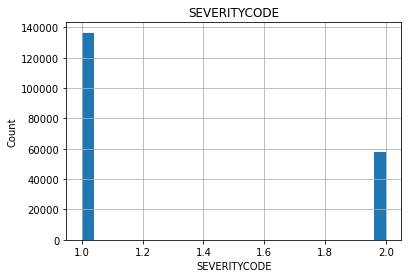

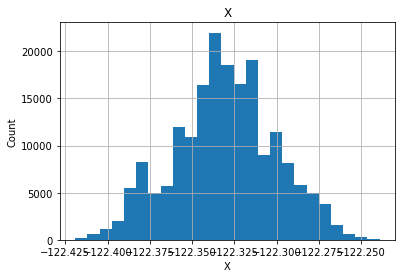

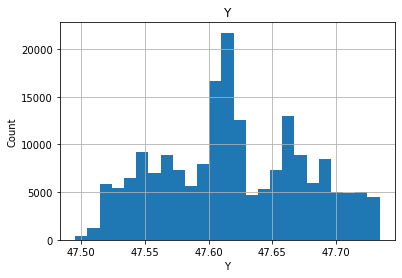

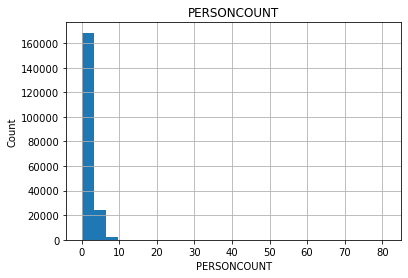

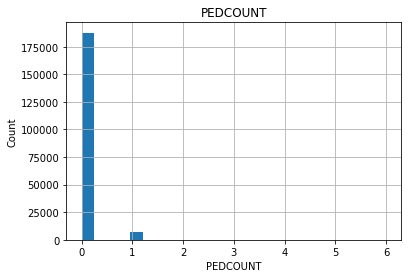

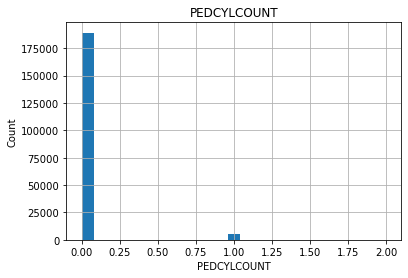

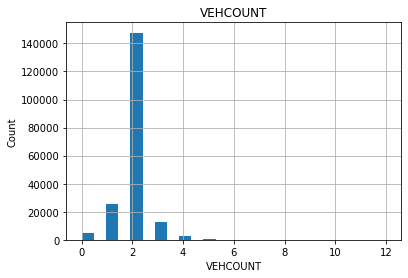

In [263]:
# analysing distribution of numerical variables

for feature in numnerical_features:
    data = X.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

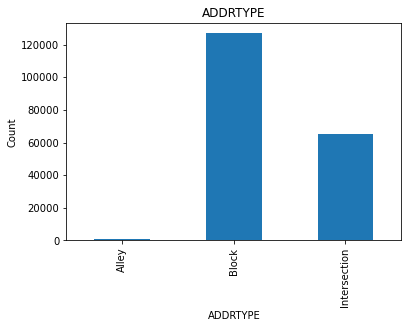

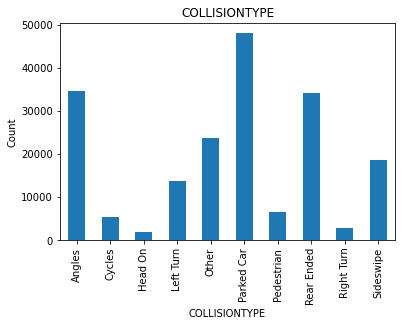

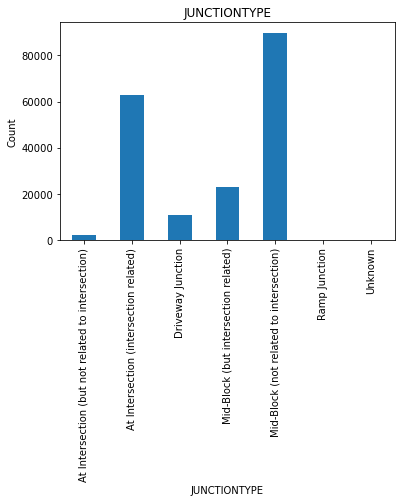

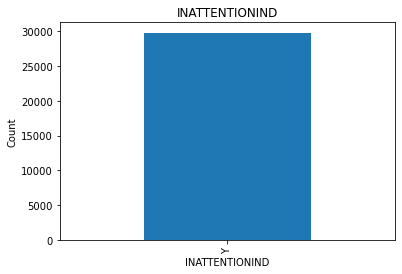

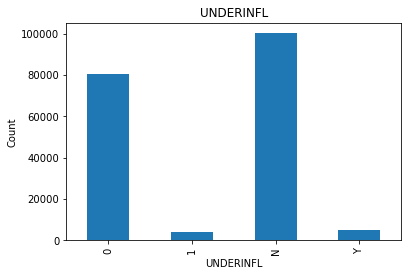

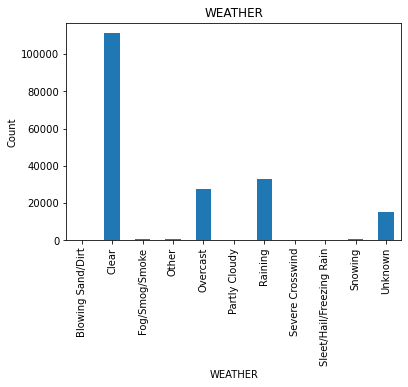

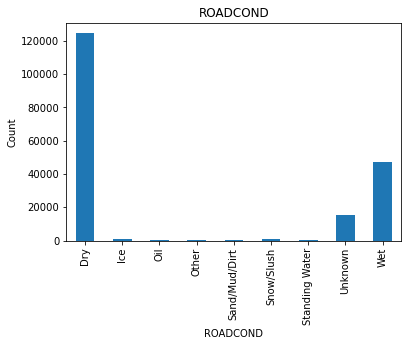

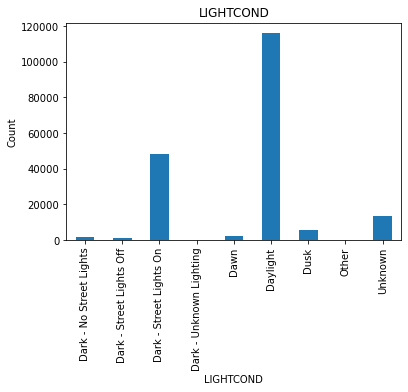

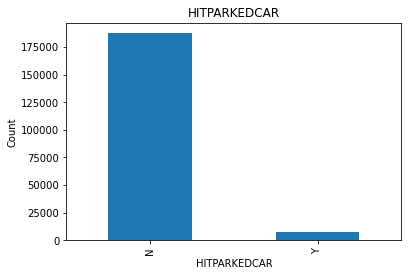

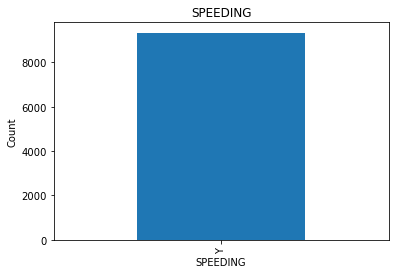

In [264]:
# analysing distribution of categorical variables

for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SEVERITYCODE'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [265]:
# from the above analysis, we can see that there are only 2 continuos variables and remaining are discrete variables
# Both continuous data were location coordinates and the figures display a normal distriution, and so we can safely assume that the centre of city might have more number of accidents due to dense population and as we move away from the centre, the frequency and number decreases
# Hencing dropping both from further inclusion
# PEDCOUNT and PEDCYLCOUNT also have more than 90% values as zero. Hence dropping them from consideration set.

X.drop(['Y'],axis=1,inplace=True)
X.drop(['X'],axis=1,inplace=True)
X.drop(['PEDCOUNT'],axis=1,inplace=True)
X.drop(['PEDCYLCOUNT'],axis=1,inplace=True)
X.head()

C:\Users\Shyam\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING
0,2,Intersection,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,N,NaN
1,1,Block,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,N,NaN
2,1,Block,Parked Car,4,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,N,NaN
3,1,Block,Other,3,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,N,NaN
4,2,Intersection,Angles,2,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,N,NaN


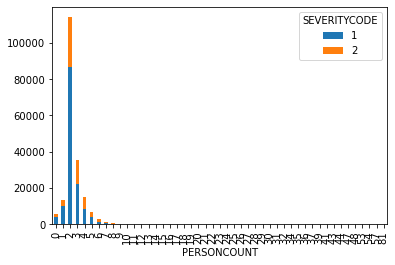

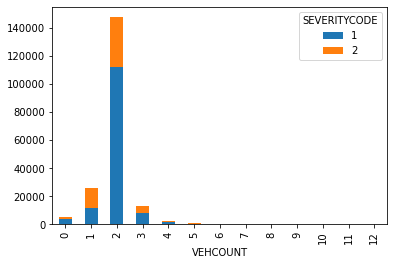

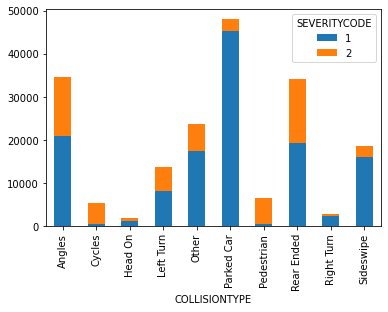

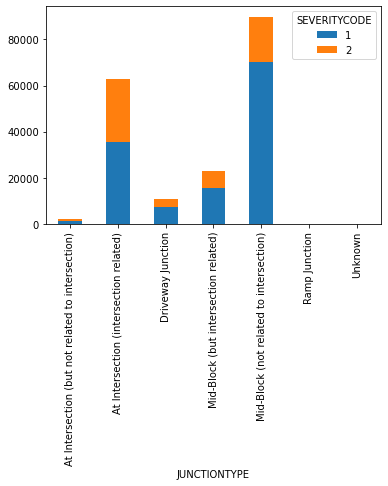

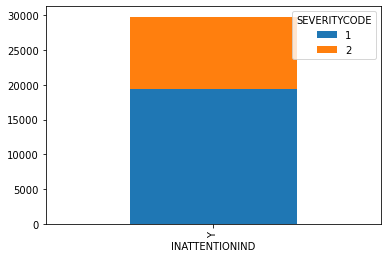

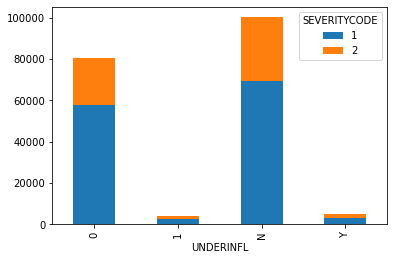

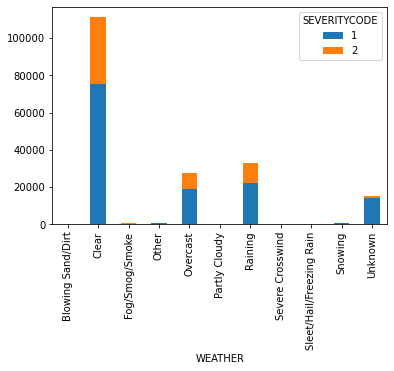

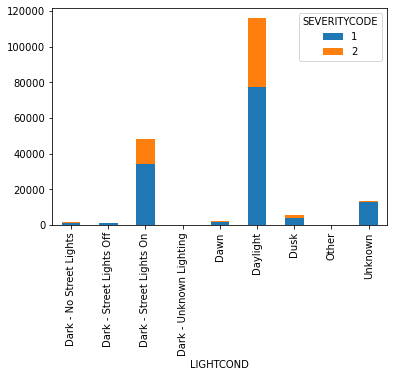

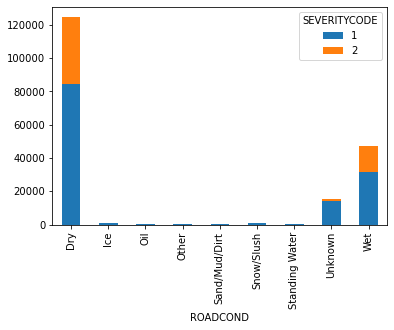

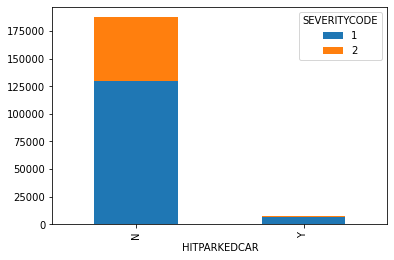

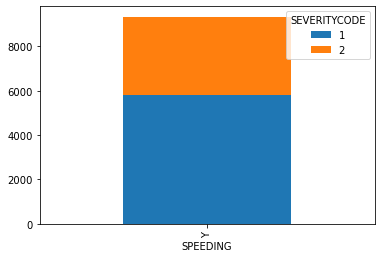

In [266]:
# Now let's identify distribution of our selected data attributes and any outliers if any

df.groupby(['PERSONCOUNT','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['VEHCOUNT','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['INATTENTIONIND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['HITPARKEDCAR','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
df.groupby(['SPEEDING','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

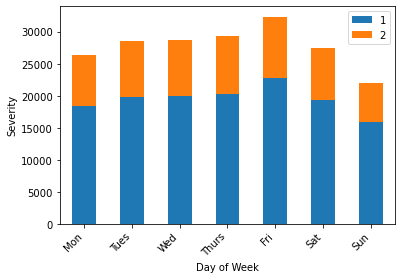

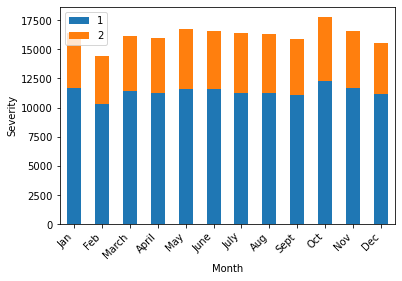

In [267]:
# Let's identify if accident numbers varies across months or days of a week
# Convert 'INCDATE' to datetime 

df['INCDATE'] =  pd.to_datetime(df['INCDATE'], format='%Y/%m/%d')
df['YEAR'] = pd.DatetimeIndex(df['INCDATE']).year
df['MONTH'] = pd.DatetimeIndex(df['INCDATE']).month
df['DAY_OF_WEEK'] = pd.DatetimeIndex(df['INCDATE']).dayofweek
temp = pd.crosstab(df['YEAR'], df['SEVERITYCODE'])
data=df['YEAR'].value_counts(dropna=False).to_frame()
data.reset_index(inplace=True)

pd.crosstab(df['DAY_OF_WEEK'], df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(7)
plt.xticks(y_pos, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=45, horizontalalignment='right')

plt.xlabel("Day of Week")
plt.ylabel("Severity")
plt.legend(['1', '2'])

pd.crosstab(df['MONTH'], df['SEVERITYCODE']).plot(kind='bar', stacked=True)

y_pos = np.arange(12)
plt.xticks(y_pos, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July','Aug','Sept','Oct','Nov','Dec'], rotation=45, horizontalalignment='right')

plt.xlabel("Month")
plt.ylabel("Severity")
plt.legend(['1', '2'])

In [268]:
# Handling missing values
# For categorical variables, we are creating a seperate class as "Missing"

cat_feature_nan = [feature for feature in X.columns if X[feature].dtypes == 'O' and X[feature].isnull().sum()>=1]
num_feature_nan = [feature for feature in X.columns if X[feature].dtypes != 'O' and X[feature].isnull().sum()>=1]
print(cat_feature_nan)
print(num_feature_nan)


def replace_cat(dataset,feature_nan):
    data = dataset.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data

dataset = replace_cat(X,cat_feature_nan)

['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
[]


In [269]:
# For numerical variables, we are replacing with the median values

for feature in num_feature_nan:
    median_value = dataset[feature].median()
    dataset[feature + '_nan'] = np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)

dataset.isnull().sum()
dataset.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING
0,2,Intersection,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),Missing,N,Overcast,Wet,Daylight,N,Missing
1,1,Block,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Missing,0,Raining,Wet,Dark - Street Lights On,N,Missing
2,1,Block,Parked Car,4,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Missing,0,Overcast,Dry,Daylight,N,Missing
3,1,Block,Other,3,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Missing,N,Clear,Dry,Daylight,N,Missing
4,2,Intersection,Angles,2,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),Missing,0,Raining,Wet,Daylight,N,Missing


In [270]:
# Handling outliers by modifying points which do not fall within 2 std away from mean

num_feature = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print(num_feature)

for feature in num_feature:
    X_mean = np.mean(dataset[feature])
    X_std = np.std(dataset[feature])

    dataset[feature] = np.where(dataset[feature] > (X_mean + 2* X_std),X_mean + 2* X_std,dataset[feature])
    dataset[feature] = np.where(dataset[feature] < (X_mean - 2* X_std),X_mean - 2* X_std,dataset[feature])
dataset.head()

['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT']


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING
0,2.0,Intersection,Angles,2.0,2.0,3/27/2013 2:54:00 PM,At Intersection (intersection related),Missing,N,Overcast,Wet,Daylight,N,Missing
1,1.0,Block,Sideswipe,2.0,2.0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Missing,0,Raining,Wet,Dark - Street Lights On,N,Missing
2,1.0,Block,Parked Car,4.0,3.0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Missing,0,Overcast,Dry,Daylight,N,Missing
3,1.0,Block,Other,3.0,3.0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Missing,N,Clear,Dry,Daylight,N,Missing
4,2.0,Intersection,Angles,2.0,2.0,1/28/2004 8:04:00 AM,At Intersection (intersection related),Missing,0,Raining,Wet,Daylight,N,Missing


In [271]:
# from the graph of categorical variables, we can see that UNDERINFL has 0 and 1 which is same as No and Yes

dataset['UNDERINFL'+ 'new'] = np.where((dataset['UNDERINFL'] == '0') | (dataset['UNDERINFL'] == 'N'),0,1)
dataset.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING,UNDERINFLnew
0,2.0,Intersection,Angles,2.0,2.0,3/27/2013 2:54:00 PM,At Intersection (intersection related),Missing,N,Overcast,Wet,Daylight,N,Missing,0
1,1.0,Block,Sideswipe,2.0,2.0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),Missing,0,Raining,Wet,Dark - Street Lights On,N,Missing,0
2,1.0,Block,Parked Car,4.0,3.0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),Missing,0,Overcast,Dry,Daylight,N,Missing,0
3,1.0,Block,Other,3.0,3.0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),Missing,N,Clear,Dry,Daylight,N,Missing,0
4,2.0,Intersection,Angles,2.0,2.0,1/28/2004 8:04:00 AM,At Intersection (intersection related),Missing,0,Raining,Wet,Daylight,N,Missing,0


In [273]:
# Converting all the categorica features into numerical values before passing it to our model

cat_feature = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print(cat_feature)

for feature in cat_feature:
    labels_ordered=dataset.groupby([feature])['SEVERITYCODE'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

[]


In [274]:
# final preprocessing by removing the unwanted variables

Y = dataset['SEVERITYCODE']
dataset = dataset.drop(['SEVERITYCODE'],axis=1)
dataset = dataset.drop(['INCDTTM'],axis=1)
dataset = dataset.drop(['UNDERINFL'],axis=1)
dataset.head(20)

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,SPEEDING,UNDERINFLnew
0,3,5,2.0,2.00000,7,0,7,8,8,1,0,0
1,2,1,2.0,2.00000,1,0,10,8,5,1,0,0
2,2,0,4.0,3.00000,1,0,7,6,8,1,0,0
3,2,4,3.0,3.00000,1,0,8,6,8,1,0,0
4,3,5,2.0,2.00000,7,0,10,8,8,1,0,0
5,3,5,2.0,2.00000,7,0,8,6,8,1,0,0
6,3,5,2.0,2.00000,7,0,10,8,8,1,0,0
7,3,9,3.0,1.00000,7,0,8,6,8,1,0,0
8,2,0,2.0,2.00000,1,0,8,6,8,1,0,0
9,3,5,2.0,2.00000,7,0,8,6,8,1,0,0


In [275]:
scaler=MinMaxScaler()
data = scaler.fit_transform(dataset)
print(data)

[[1.         0.5        0.38938703 ... 1.         0.         0.        ]
 [0.66666667 0.1        0.38938703 ... 1.         0.         0.        ]
 [0.66666667 0.         0.77877406 ... 1.         0.         0.        ]
 ...
 [1.         0.6        0.58408055 ... 1.         0.         0.        ]
 [1.         0.9        0.38938703 ... 1.         0.         0.        ]
 [0.66666667 0.7        0.38938703 ... 1.         0.         0.        ]]


In [276]:
# Dividing the dataset into train and test data (80-20 split)

X_train,X_test,y_train,y_test=train_test_split(data,Y,test_size=0.2,random_state=0)

In [277]:
## Skipping KNN as it is not a good fit for large data 
## Applying Logistic Regression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)

print("Jaccard: " + str(jaccard_score(y_test, yhat_lg)))
print("F1 Score: " + str(f1_score(y_test, yhat_lg)))
print("Accuracy: ", metrics.accuracy_score(y_test, yhat_lg))
print("LogLoss: " + str(log_loss(y_test, yhat_lg_prob)))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

Jaccard: 0.7181841585857719
F1 Score: 0.8359804215363101
Accuracy:  0.7469628868627199
LogLoss: 0.4952020776023226
              precision    recall  f1-score   support

         1.0       0.77      0.90      0.83     27312
         2.0       0.62      0.38      0.47     11623

    accuracy                           0.75     38935
   macro avg       0.70      0.64      0.65     38935
weighted avg       0.73      0.75      0.73     38935



In [278]:
# Applying Decision Tree

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train,y_train)
predTree = DT.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Jaccard: " + str(jaccard_score(y_test, predTree)))
print("F1 Score: " + str(f1_score(y_test, predTree)))

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

Accuracy:  0.7493001155772441
Jaccard: 0.734741018533616
F1 Score: 0.8470901543040652
              precision    recall  f1-score   support

         1.0       0.77      0.92      0.84     27312
         2.0       0.65      0.34      0.44     11623

    accuracy                           0.75     38935
   macro avg       0.71      0.63      0.64     38935
weighted avg       0.73      0.75      0.72     38935



In [279]:

classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.77      0.92      0.84     27312
         2.0       0.65      0.35      0.46     11623

    accuracy                           0.75     38935
   macro avg       0.71      0.64      0.65     38935
weighted avg       0.73      0.75      0.72     38935

